In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
music_data = pd.read_csv("C:/Users/GK TECH/Downloads/music.csv")
X=music_data.drop(columns=['genre'])
Y=music_data['genre']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [4]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Prediction using test set of data 

In [7]:
prediction = model.predict(x_test)
prediction

array(['Jazz', 'Classical', 'Dance', 'Classical'], dtype=object)

In [11]:
score=accuracy_score(y_test,prediction)
score

0.5

Save the trained model

In [23]:
from sklearn.externals import joblib
joblib.dump(model,'music_recommender.joblib')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\GK TECH\anaconda3\Lib\site-packages\sklearn\externals\__init__.py)

Run and make prediction the model using saved model

In [81]:
model=joblib.load('music_recommender.joblib')
pred = model.predict([[21,1]])
pred

NameError: name 'joblib' is not defined

Visualize the decision tree model

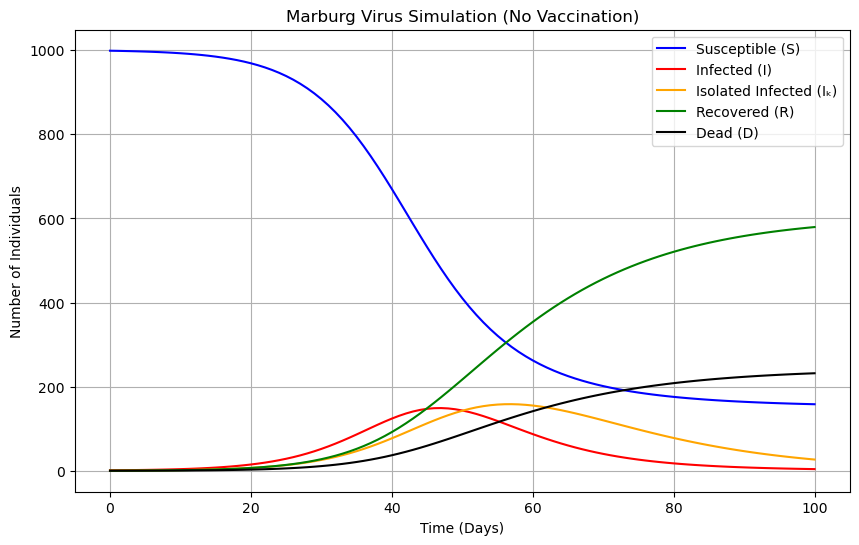

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
beta = 0.3    # Transmission rate between susceptible and infected
beta_k = 0.05 # Transmission rate between susceptible and isolated infected
alpha = 0.1   # Rate at which infected individuals move to isolation
gamma = 0.05  # Recovery rate
delta = 0.02  # Mortality rate
N = 1000      # Total population

# Initial conditions
S0 = 999
I0 = 1
Ik0 = 0
R0 = 0
D0 = 0

# Time parameters
T = 100  # Total time (days)
dt = 1   # Time step (1 day)
time = np.arange(0, T+1, dt)

# Arrays to store the results
S = np.zeros(len(time))
I = np.zeros(len(time))
Ik = np.zeros(len(time))
R = np.zeros(len(time))
D = np.zeros(len(time))

# Initial values
S[0] = S0
I[0] = I0
Ik[0] = Ik0
R[0] = R0
D[0] = D0

# Euler method to solve the system of ODEs
for t in range(1, len(time)):
    # Calculate the rates of change
    dS = - (beta * S[t-1] * I[t-1] / N + beta_k * S[t-1] * Ik[t-1] / N)
    dI = (beta * S[t-1] * I[t-1] / N + beta_k * S[t-1] * Ik[t-1] / N) - (gamma + delta) * I[t-1] - alpha * I[t-1]
    dIk = alpha * I[t-1] - (gamma + delta) * Ik[t-1]
    dR = gamma * I[t-1] + gamma * Ik[t-1]
    dD = delta * I[t-1] + delta * Ik[t-1]

    # Update the values
    S[t] = S[t-1] + dS * dt
    I[t] = I[t-1] + dI * dt
    Ik[t] = Ik[t-1] + dIk * dt
    R[t] = R[t-1] + dR * dt
    D[t] = D[t-1] + dD * dt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, S, label="Susceptible (S)", color='blue')
plt.plot(time, I, label="Infected (I)", color='red')
plt.plot(time, Ik, label="Isolated Infected (Iₖ)", color='orange')
plt.plot(time, R, label="Recovered (R)", color='green')
plt.plot(time, D, label="Dead (D)", color='black')
plt.title("Marburg Virus Simulation")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Individuals")
plt.legend()
plt.grid(True)
plt.show()